# Estimators, Predictors, and Transformers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# StandardScaler and LinearRegression will be imported below for pedagogical reasons, 
# otherwise they would have been placed here. 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Generating Random Data

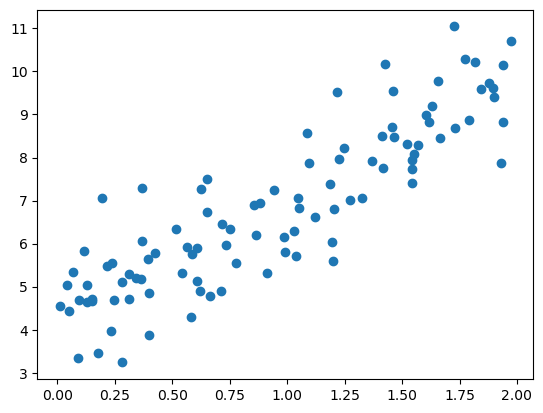

In [18]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)

# Transforming Our Data by Standardizing to Zero Mean and Unit Variance

In [4]:
print(np.mean(X))
print(np.var(X))

0.9403614867564187
0.35045980067831656


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [6]:
# Learned parameters are accessed by using an underscore suffix.
print(scaler.mean_)
print(scaler.var_)

# Hyperparameters are accessible as public attributes. 
# with_std is by default set to True, check the documentation. 
print(scaler.with_std)

[0.94036149]
[0.3504598]
True


In [7]:
X_transformed = scaler.transform(X)

In [22]:
print("{:.6f}".format(np.mean(X_transformed))) # want to use:.6 to get 6 decimals so we get a more clearer printout
print(np.var(X_transformed))

-0.000000
1.0000000000000002


In [9]:
# the fit_transform method lets you combine both steps of fitting and transforming your data into one. 
scaler_2 = StandardScaler()
X_transformed_2 = scaler_2.fit_transform(X)

In [10]:
print("{:.6f}".format(np.mean(X_transformed_2)))
print(np.var(X_transformed_2))

-0.000000
1.0000000000000002


# Estimating Our Model and Inspecting Parameters

In [11]:
from sklearn.linear_model import LinearRegression

# Demonstrating that we initialize and then fit our model.
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_transformed, y) #realize that we use X_transformed and not X, so the coefficients are different and not near 4 and 3 

LinearRegression()

In [12]:
# Checking our Hyper-parameters and their corresponding default values in this case. 
lin_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [13]:
# Learned parameters are accessed using a suffix. 
print(lin_reg.intercept_, lin_reg.coef_)

[6.8200041] [[1.6398973]]


# Making Predictions With Our Model

In [14]:
X_new = np.array([[0], [1], [2]])

In [15]:
# lin_reg is now used as a predictor. 
y_pred_lr = lin_reg.predict(scaler.transform(X_new))  # Notice, we only transform new data, no fitting is done. 
print(y_pred_lr)

[[4.21509616]
 [6.98520954]
 [9.75532293]]


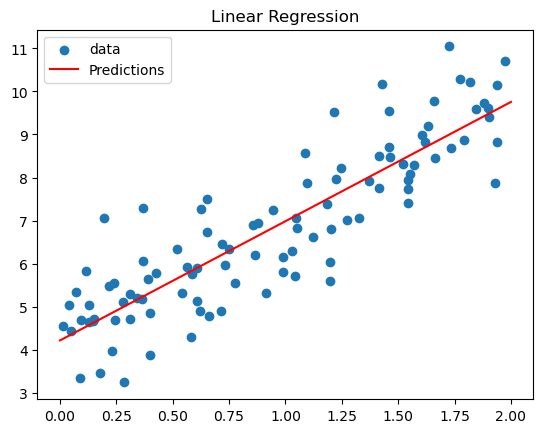

In [23]:
fig, ax = plt.subplots()
ax.set_title("Linear Regression")
ax.scatter(X, y, label = "data")
ax.plot(X_new, y_pred_lr, 'r', label = 'Predictions') # have values that we will predict. 
ax.legend()